<a href="https://colab.research.google.com/github/Priyesh29sri/GenerativeAI/blob/main/Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ReAct Agent Using Langgraph

In [88]:
!pip install langchain-core langchain-community langchain-openai duckduckgo-search langchain-google-genai langgraph langchain-together

In [77]:
import os
os.environ["TOGETHER_API_KEY"] = "15d97e6a80e3c543cf500f220f2bc7f355a83843592754e976c699eaa8f9924c"

In [87]:
from langchain.tools import DuckDuckGoSearchResults
from langchain.agents import AgentExecutor, create_react_agent
from langchain_together import ChatTogether
from langchain_core.tools import tool

search_tool = DuckDuckGoSearchResults()

@tool
def multiply(a: int, b: int) -> int:
  '''Multiplies two numbers'''
  return a * b


In [80]:
from langgraph.prebuilt import create_react_agent
from langchain_together import ChatTogether

model = ChatTogether(model = "meta-llama/Llama-3.3-70B-Instruct-Turbo-Free", temperature=0)
tools = [search_tool, multiply]
graph = create_react_agent(model, tools=tools)


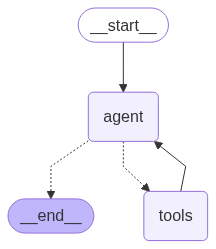

In [81]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [84]:
inputs = {"messages": [("user", "what is the 5 times the current age of Sharukh khan?")]}
response = graph.invoke(inputs)

for m in response ['messages']:
  m.pretty_print()


================================ Human Message =================================

what is the 5 times the current age of Sharukh khan?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_p6robnegkkt0bin7yynwkt41)
 Call ID: call_p6robnegkkt0bin7yynwkt41
  Args:
    a: 5
    b: {'args': ['current age of Sharukh khan'], 'function_name': 'duckduckgo_results_json'}
================================= Tool Message =================================
Name: multiply

Error: 1 validation error for multiply
b
  Input should be a valid integer [type=int_type, input_value={'args': ['current age of...uckduckgo_results_json'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/int_type
 Please fix your mistakes.
================================== Ai Message ==================================

Sharukh Khan was born on November 2, 1965. Therefore, as of 2024, he is 58 years old.

Five times his current age would b

## Example 2

In [86]:
from langchain_core.tools import tool
import math

@tool
def multiply(a: int, b: int) -> int:
  "Multiply a and b"
  return a*b


@tool
def square_root(a: int) -> int:
  "Square root of a"
  return math.sqrt(a)

@tool
def power(base: int, exponent: int) -> int:
  "Raise base to the power of exponent"
  return base ** exponent

tools = [multiply, square_root, power]

In [90]:
from langgraph.prebuilt import create_react_agent
from langchain_together import ChatTogether

model = ChatTogether(model = "meta-llama/Llama-3.3-70B-Instruct-Turbo-Free", temperature=0)
graph = create_react_agent(model, tools=tools)

In [92]:
inputs = {"messages": [("user", "what is the square root of 4 raised to power of 10 multiplied by 5? ")]}
response = graph.invoke(inputs)

for m in response ['messages']:
  m.pretty_print()

================================ Human Message =================================

what is the square root of 4 raised to power of 10 multiplied by 5? 
================================== Ai Message ==================================
Tool Calls:
  multiply (call_rpll397v7toubezgyuz88p9v)
 Call ID: call_rpll397v7toubezgyuz88p9v
  Args:
    a: {'args': [{'args': [4, 10], 'function_name': 'power'}], 'function_name': 'square_root'}
    b: 5
================================= Tool Message =================================
Name: multiply

Error: 1 validation error for multiply
a
  Input should be a valid integer [type=int_type, input_value={'args': [{'args': [4, 10...on_name': 'square_root'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/int_type
 Please fix your mistakes.
================================== Ai Message ==================================

To calculate the square root of 4 raised to the power of 10 multiplied by 5, we need to follow the orde